# Introduction to Deep Learning in Python
Learn the fundamentals concepts and terminology used in deep learning. You'll build simple neural networks and generate predictions with them. You'll also learn how to optimize the predictions generated by your neural networks. You'll use a method called backward propagation, which is one of the most important techniques in deep learning. 

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

## Table Of Contents
0. [Initial Set-Up for Google Colab](#initial-set-up-for-google-colab)
1. [Initial Set-Up (offline)](#initial-set-up-offline)
2. [Building a Neuron](#Building-a-Neuron)
3. [Defining the architecture](#Defining-the-architecture)
4. [Forward Propagation](#Coding-The-Forward-Propagation-Algorithm)
5. [Activation Functions](#Activation-Functions)
6. [Applying Network To Many Observations](#Applying-The-Network-To-Many-Observations/Rows-Of-Data)
7. [Multi-Layer NN](#Multi-Layer-Neural-Networks)
8. [Calculating Errors](#Calculating-Errors-And-Change-Model-Accuracy)
9. [How Weight Changes Affect Accuracy](#How-Weight-Changes-Affect-Accuracy)
    - [Exercise](#Exercise)
10. [Scaling Up To Multiple Data Points](#Scaling-Up-To-Multiple-Data-Points)
11. [Improving Model Weights](#Improving-Model-Weights)

## Initial Set-Up for Google Colab
<u> Execute these code blocks just in Google Colab! </u>

In [ ]:
!wget -q -O - https://github.com/University-Clinic-of-Neuroradiology/python-bootcamp/archive/refs/heads/main.tar.gz | tar -xzf - --strip-components=2 python-bootcamp-main/notebooks/DeepLearning

In [ ]:
import os
import sys
from google.colab import output
output.enable_custom_widget_manager()

sys.path.insert(0,'DeepLearning')
os.chdir(sys.path[0])

In [ ]:
%pip install -q ipympl numpy matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Initial Set-Up (offline)

In [1]:
# Make sure figures appears inline and animations works
# Edit this to ""%matplotlib notebook" when using the "classic" jupyter notebook interface
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## --- Start notebook ---

## Building a Neuron

Neurons are the fundamental building blocks to a neural network. Just like how biological neurons send an electrical impulse under specific stimuli, artificial neural networks similarly result in a numerical output with a given numerical input.

We can break down building a neuron into 3 steps:
- Defining the architecture
- Intiating training
- Evaluating the model

## Defining the architecture
<center>
<a title="BruceBlaus, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Blausen_0657_MultipolarNeuron.png"><img width="512" alt="Blausen 0657 MultipolarNeuron" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/512px-Blausen_0657_MultipolarNeuron.png"></a>
<p><small>
Image courtesy of <a href="https://commons.wikimedia.org/wiki/File:Blausen_0657_MultipolarNeuron.png">Wikimedia Commons</a>
</small></p>
</center>

Biological neurons transmit information with a mechanism similar to [Morse Code](https://news.weill.cornell.edu/news/2007/09/scientists-find-clues-to-crack-brains-neural-code). It receives electrical signals through the dendrites, and under the right conditions, sends an electrical impulse down the axon and out through the terminals.

It is theorized the sequence and timing of these impulses play a large part of how information travels through the brain. Most artificial neural networks have yet to capture this timing aspect of biological neurons, and instead emulate the phenomenon with simpler mathematical formulas.

## Coding The Forward Propagation Algorithm

In this exercise, you'll write code to do forward propagation (prediction) for your first neural network.

![alt text](Images/model.png "Model template")

We define the inputs as `input_data`, and the weights are available in a dictionary called `weights`. The array of weights for the first node in the hidden layer are in `weights['node_0']`, and the array of weights for the second node in the hidden layer are in `weights['node_1']`.

The weights feeding into the output node are available in `weights['output']`.

In [3]:
input_data = np.array([2, 4])
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
print('input data is',input_data)
print('weights are',weights)

input data is [2 4]
weights are {'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}


In [4]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(input_data,'*',weights['node_0'],'=',(input_data * weights['node_0']),'-> sum is:',node_0_value)
print(input_data,'*',weights['node_1'],'=',(input_data * weights['node_1']),'-> sum is:',node_1_value)
print('hidden layer',hidden_layer_outputs)
print(hidden_layer_outputs,'*',weights['output'],'=',(hidden_layer_outputs * weights['output']),'->sum is:',output)
print('output',output)

[2 4] * [2 4] = [ 4 16] -> sum is: 20
[2 4] * [ 4 -5] = [  8 -20] -> sum is: -12
hidden layer [ 20 -12]
[ 20 -12] * [2 7] = [ 40 -84] ->sum is: -44
output -44



​

![alt text](Images/model_afterfeeding.png "Model template")

​



​


## Activation Functions
An "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. 
This function takes a single number as an input, returning <b>0</b> if the input is <b>negative</b>, and the <b>input</b> if the input is <b>positive</b>.

Here are some examples:
```Shell
relu(3) = 3
relu(-3) = 0
```

In [5]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

In [6]:
# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()


print(input_data,'*',weights['node_0'],'=',(input_data * weights['node_0']),'-> sum is:',node_0_input,'-> after relu:',node_0_output)
print(input_data,'*',weights['node_1'],'=',(input_data * weights['node_1']),'-> sum is:',node_1_input,'-> after relu:',node_1_output)
print('hidden layer',hidden_layer_outputs)
print(hidden_layer_outputs,'*',weights['output'],'=',(hidden_layer_outputs * weights['output']),'->sum is:',output)
print('output',model_output)


# Print model output
print(model_output)

[2 4] * [2 4] = [ 4 16] -> sum is: 20 -> after relu: 20
[2 4] * [ 4 -5] = [  8 -20] -> sum is: -12 -> after relu: 0
hidden layer [20  0]
[20  0] * [2 7] = [40  0] ->sum is: -44
output 40
40



​

![alt text](Images/model_afterfeeding&relu.png "Model template")

​



​


## Applying The Network To Many Observations/Rows Of Data
Now we define a function called `predict_with_network()` which will generate predictions for multiple data observations, which are pre-loaded as `input_data`. As before, `weights` are also pre-loaded. In addition, the `relu()` function we defined in the previous cell.

In [7]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
print('input data is',input_data)
print('weights are',weights)

input data is [array([3, 5]), array([ 1, -1]), array([0, 0]), array([8, 4])]
weights are {'node_0': array([2, 4]), 'node_1': array([ 4, -5]), 'output': array([2, 7])}


In [8]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [9]:
# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)

[52, 63, 0, 148]



​

![alt text](Images/model_afterfeeding&relu_multiinput.png "Model template")

​



​


## Multi-Layer Neural Networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as `input_data`. The nodes in the first hidden layer are called `node_0_0` and `node_0_1`. Their weights are pre-loaded as `weights['node_0_0']` and `weights['node_0_1']` respectively.

The nodes in the second hidden layer are called `node_1_0` and `node_1_1`. Their weights are pre-loaded as `weights['node_1_0']` and `weights['node_1_1']` respectively.

We then create a model output from the hidden nodes using weights pre-loaded as `weights['output']`.

![alt text](Images/deeper_model.png "Model template")

In [10]:
input_data = np.array([2, 4])
weights = {'node_0_0': np.array([2, 4]), 'node_0_1': np.array([ 4, -5]), 'node_1_0': np.array([-1,  2]), 'node_1_1': np.array([1, 2]), 'output': np.array([2, 7])}
print('input data is',input_data)
print('weights are',weights)

input data is [2 4]
weights are {'node_0_0': array([2, 4]), 'node_0_1': array([ 4, -5]), 'node_1_0': array([-1,  2]), 'node_1_1': array([1, 2]), 'output': array([2, 7])}


In [11]:
def predict_with_network2(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network2(input_data)
print(output)

140



​

![alt text](Images/deeper_model_afterfeeding&relu.png "Model template")

​



​

## Calculating Errors And Change Model Accuracy
What is the error (predicted - actual) for the following network using the ReLU activation function when the input data is [3, 2] and the actual value of the target (what you are trying to predict) is 5?

In [12]:
input_data = np.array([3, 2])
weights = {'node_0': np.array([2, 1]), 'node_1': np.array([ 0, 0]), 'output': np.array([2, 2])}

target_actual = 5

# we use our network from the beginning
model_output = predict_with_network(input_data,weights)

# Calculate error: error
error = model_output - target_actual
print('input data is',input_data)
print('weights are',weights)
print('target is',target_actual)
print('output is',model_output)
print('error is',error)


input data is [3 2]
weights are {'node_0': array([2, 1]), 'node_1': array([0, 0]), 'output': array([2, 2])}
target is 5
output is 16
error is 11


We want to change the weights and see how they affect the model accuracy.

## How Weight Changes Affect Accuracy

### Exercise
Your task in this exercise is to update a single weight in `weights` to create `weights_new`, which gives a perfect prediction (in which the predicted value is equal to `target_actual = 5`).

Tasks:
- Define new weights in the variable `weights_new`
- save the model output with the modified weights in `model_output_new`
- calculate and print the error
- repeat the process until the error is 0.

Even though it may seem difficult at first, the task is mathematically very easy to solve.

In [13]:
# Write your code here (the solution is below)








In [14]:
### Solution
# Create weights that cause the network to make perfect prediction (5): weights_new
weights_new = {'node_0': [1, 1],
               'node_1': [1, 1],
               'output': [1, 0]
              }

# Make prediction using new weights: model_output_new
model_output_new = predict_with_network(input_data, weights_new)

# Calculate error: error_1
error_new = model_output_new - target_actual

# Print error_new
print(error_new)

0


## Scaling Up To Multiple Data Points
We want to measure the model accuracy on many points. We need code to compare model accuracies for two different sets of weights, which have been stored as `weights_0` and `weights_1`.

`input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. `target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.

In [15]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}

print('input data is',input_data)
print('weights are',weights_0,weights_1)
print('target is',target_actuals)


input data is [array([0, 3]), array([1, 2]), array([-1, -2]), array([4, 0])]
weights are {'node_0': array([2, 1]), 'node_1': array([1, 2]), 'output': array([1, 1])} {'node_0': array([2, 1]), 'node_1': array([1. , 1.5]), 'output': array([1. , 1.5])}
target is [1, 3, 5, 7]


In [16]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" % mse_0)
print("Mean squared error with weights_1: %f" % mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Improving Model Weights

In [17]:
input_data = np.array([3, 2])
learning_rate=0.01
weights = {'node_0': np.array([2, 1]), 'node_1': np.array([ 0, 0]), 'output': np.array([2, 2])}

target_actual = 5

# we use our network from the beginning
model_output = predict_with_network(input_data,weights)

# Calculate error: error
error = model_output - target_actual
print('input data is',input_data)
print('weights are',weights)
print('target is',target_actual)
print('output is',model_output)
print('error is',error)

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated

weights_updated = {'node_0': np.array([2, 1]) - learning_rate * slope,
                   'node_1': np.array([ 0, 0]) - learning_rate * slope,
                   'output': np.array([2, 2]) - learning_rate * slope}



# Get updated predictions: preds_updated
model_output_updated = predict_with_network(input_data,weights_updated)

# Calculate updated error: error_updated
error_updated = model_output_updated - target_actual

# Print the original error
print('error was:',error)

# Print the updated error
print('error updated is:',error_updated)

input data is [3 2]
weights are {'node_0': array([2, 1]), 'node_1': array([0, 0]), 'output': array([2, 2])}
target is 5
output is 16
error is 11
error was: 11
error updated is: 1.887599999999999


## Making multiple updates to weights

In [18]:
def get_slope(input_data, target, weights):
    model_output = predict_with_network(input_data,weights)
    error = model_output - target_actual
    slope = 2 * input_data * error
    return slope

In [19]:
def get_mse(input_data, target, weights):
    model_output = predict_with_network(input_data,weights)
    mse= model_output - target
    return mse

[4.8876 3.8876]
[3.70340765 2.70340765]
[3.29055398 2.29055398]
[3.12452332 2.12452332]
[3.05417353 2.05417353]
[3.02371907 2.02371907]
[3.01041386 2.01041386]
[3.00457775 2.00457775]
[3.00201337 2.00201337]
[3.00088572 2.00088572]


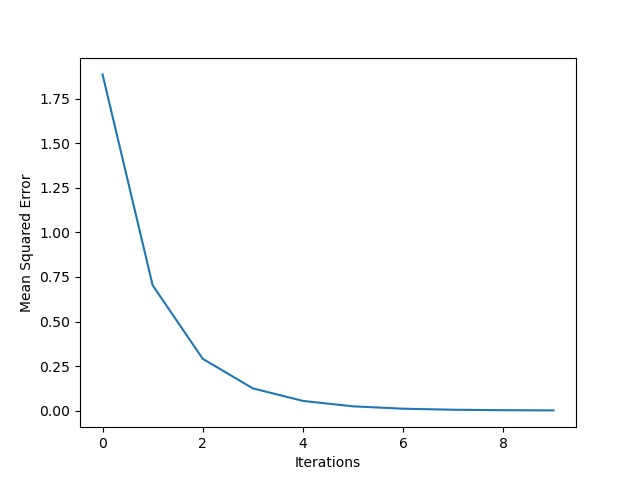

In [20]:
#Making multiple updates to weights
input_data = np.array([3, 2])

weights = {'node_0': np.array([2, 1]), 'node_1': np.array([ 0, 0]), 'output': np.array([2, 2])}

target_actual = 5

n_updates = 10
mse_hist = []
slop=0

# Iterate over the number of updates
weights_updated = {'node_0': np.array([2, 1]),
                   'node_1': np.array([ 0, 0]),
                   'output': np.array([2, 2])}
for i in range(n_updates):

    #model_output.append(predict_with_network(input_data, weights))
    
    # Update the weights: weights
    weights_updated = {'node_0': weights_updated['node_0'] - learning_rate * slope,
                       'node_1': weights_updated['node_1'] - learning_rate * slope,
                       'output': weights_updated['output'] - learning_rate * slope}
    
    # Calculate the slope: slope
    slope = get_slope(input_data, target_actual, weights_updated)

    #print(slope)

    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target_actual, weights_updated)

    # Append the mse to mse_hist
    mse_hist.append(mse)
    print(input_data+mse) 
# Plot the mse history
plt.figure()
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()